In [118]:
#Import all relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder

## This statement allows the visuals to render within your Jupyter Notebook.
%matplotlib inline

## Loading the data
We can now load the dataset into pandas using the read_csv() function. This converts the CSV file into a Pandas dataframe.

In [67]:
df = pd.read_csv(r"final_data.csv")

### Viewing the dataframe
We can get a quick sense of the size of our dataset by using the shape method. This returns a tuple with the number of rows and columns in the dataset.

In [68]:
df.shape

(10754, 22)

In [69]:
df.head()

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
0,/david-de-gea/profil/spieler/59377,Manchester United,David de Gea,Goalkeeper,189.0,32.0,104,0.000000,0.000000,0.009585,...,1.217252,0.335463,9390,42,5,13,15000000,70000000,1,0
1,/jack-butland/profil/spieler/128899,Manchester United,Jack Butland,Goalkeeper,196.0,30.0,15,0.000000,0.000000,0.069018,...,1.242331,0.207055,1304,510,58,1,1500000,22000000,1,0
2,/tom-heaton/profil/spieler/34130,Manchester United,Tom Heaton,Goalkeeper,188.0,37.0,4,0.000000,0.000000,0.000000,...,0.616438,0.924658,292,697,84,4,600000,6000000,1,0
3,/lisandro-martinez/profil/spieler/480762,Manchester United,Lisandro Martínez,Defender Centre-Back,175.0,25.0,82,0.028090,0.056180,0.224719,...,0.000000,0.000000,6408,175,22,9,50000000,50000000,2,0
4,/raphael-varane/profil/spieler/164770,Manchester United,Raphaël Varane,Defender Centre-Back,191.0,30.0,63,0.017889,0.017889,0.053667,...,0.000000,0.000000,5031,238,51,21,40000000,80000000,2,0


## 1. Data Profiling:
Data profiling is a comprehensive process of examining the data available in an existing dataset and collecting statistics and information about that data. 

The process of profiling differs slightly for categorical and numerical variables due to their inherent differences.

**The two main types of data are:**
- Quantitative (numerical) data
- Qualitative (categorical) data

### Data Quality Checks
Data quality checks involve the process of ensuring that the data is accurate, complete, consistent, relevant, and reliable. 


**Here are typical steps involved in checking data quality:**

#### 1. Reliability:
Evaluate the data's source and collection process to determine its trustworthiness.

#### 2. Timeliness: 
Ensure the data is up-to-date and reflective of the current situation or the period of interest for the analysis.

#### 3. Consistency: 

Confirm that the data is consistent within the dataset and across multiple data sources. For example, the same data point should not have different values in different places.


#### 4. Relevance: 
Assess whether the data is appropriate and applicable for the intended analysis. Data that is not relevant can skew results and lead to incorrect conclusions.

**Key considerations for relevance include:**

> 1. Sample Appropriateness: Confirm that your data sample aligns with your analysis objectives. For instance, utilizing data from the Northern region will not yield accurate insights for the Western region of the Kingdom.
>
> 2. Variable Selection: Any column will not be relevant for our analysis, we can get rid of these using the drop() method. We will set the “axis” argument to 1 since we’re dealing with columns, and set the “inplace” argument to True to make the change permanent.


#### 5. Uniqueness: 
Check for and remove duplicate records to prevent skewed analysis results.


In [70]:
df.duplicated().sum()

0

#### 6. Completeness: 
Ensure that no critical data is missing. This might mean checking for null values or required fields that are empty.

We will start by checking the dataset for missing or null values. For this, we can use the isna() method which returns a dataframe of boolean values indicating if a field is null or not. To group all missing values by column, we can include the sum() method.

In [71]:
df.isnull().sum()

player                 0
team                   0
name                   0
position               0
height                 0
age                    0
appearance             0
goals                  0
assists                0
yellow cards           0
second yellow cards    0
red cards              0
goals conceded         0
clean sheets           0
minutes played         0
days_injured           0
games_injured          0
award                  0
current_value          0
highest_value          0
position_encoded       0
winger                 0
dtype: int64

#### 7. Check Accuracy:

Verify that the data is correct and precise. This could involve comparing data samples with known sources or using validation rules.

**The process includes:**
1. Validating the appropriateness of data types for the dataset.
2. Identifying outliers  using established validation  rule

In [72]:
df.columns

Index(['player', 'team', 'name', 'position', 'height', 'age', 'appearance',
       'goals', 'assists', 'yellow cards', 'second yellow cards', 'red cards',
       'goals conceded', 'clean sheets', 'minutes played', 'days_injured',
       'games_injured', 'award', 'current_value', 'highest_value',
       'position_encoded', 'winger'],
      dtype='object')

In [73]:
df.dtypes

player                  object
team                    object
name                    object
position                object
height                 float64
age                    float64
appearance               int64
goals                  float64
assists                float64
yellow cards           float64
second yellow cards    float64
red cards              float64
goals conceded         float64
clean sheets           float64
minutes played           int64
days_injured             int64
games_injured            int64
award                    int64
current_value            int64
highest_value            int64
position_encoded         int64
winger                   int64
dtype: object

In [74]:
df.drop(['player', 'name', 'appearance', 'days_injured', 'clean sheets'], axis=1, inplace=True)

In [75]:
df.head(2)

,team,position,height,age,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,minutes played,games_injured,award,current_value,highest_value,position_encoded,winger
0,Manchester United,Goalkeeper,189.0,32.0,0.0,0.0,0.009585,0.0,0.0,1.217252,9390,5,13,15000000,70000000,1,0
1,Manchester United,Goalkeeper,196.0,30.0,0.0,0.0,0.069018,0.0,0.0,1.242331,1304,58,1,1500000,22000000,1,0


In [76]:
categorical_features = ['team', 'position']

numeric_features = ['height', 'age', 'goals', 'assists', 'yellow cards', 'second yellow cards', 'red cards', 'goals conceded', 'minutes played', 'games_injured', 'award', 'current_value', 'highest_value', 'position_encoded', 'winger']

In [77]:
numeric_features

['height',
 'age',
 'goals',
 'assists',
 'yellow cards',
 'second yellow cards',
 'red cards',
 'goals conceded',
 'minutes played',
 'games_injured',
 'award',
 'current_value',
 'highest_value',
 'position_encoded',
 'winger']

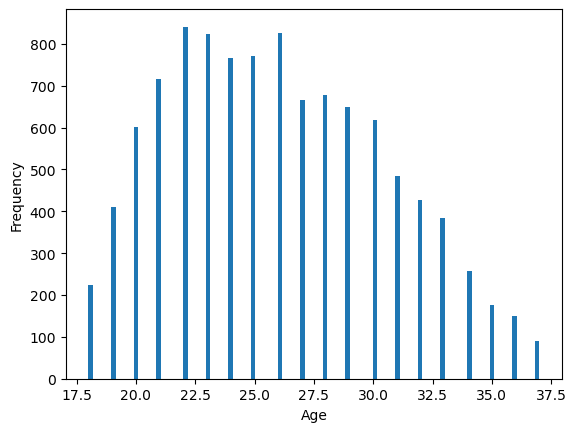

In [78]:
df = df[df['age']>=18]
df = df[df['age']<=37]
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.hist(df['age'], bins=100)
plt.show()

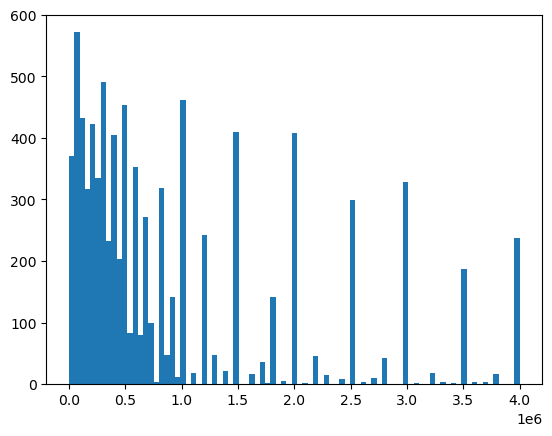

In [79]:
df = df[df['current_value']<=4000000]
plt.hist(df['current_value'], bins= 85)
plt.show()

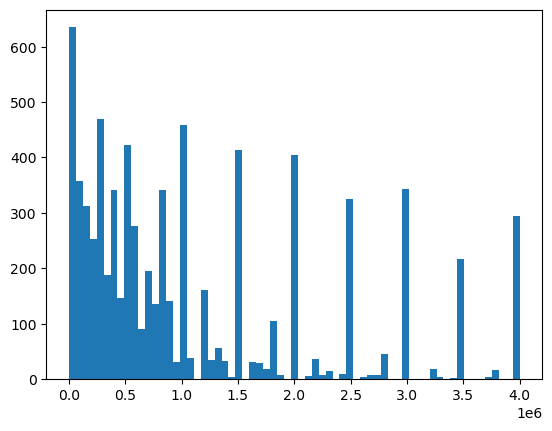

In [80]:
df = df[df['highest_value']<=4000000]
plt.hist(df['highest_value'], bins= 65)
plt.show()

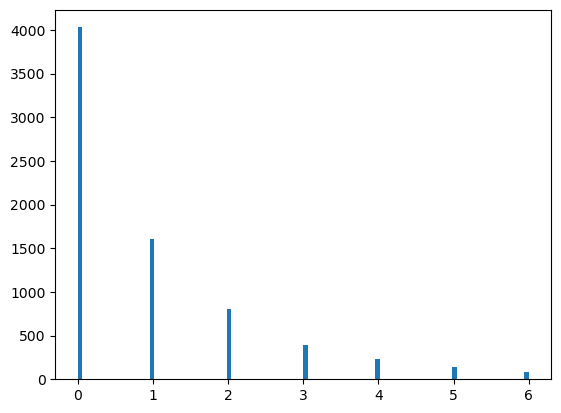

In [81]:
df = df[df['award']<=6]
plt.hist(df['award'], bins=100)
plt.show()

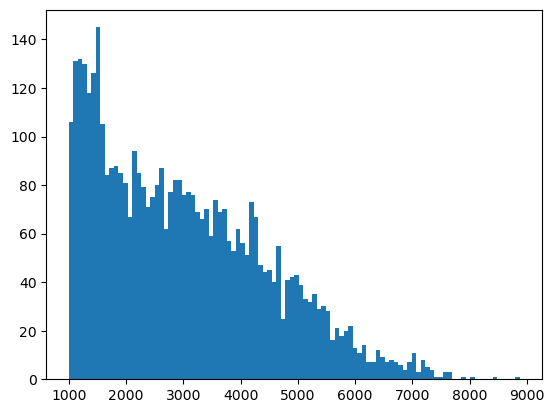

In [82]:
df= df[df['minutes played']>=1000]
plt.hist(df['minutes played'], bins=100)
plt.show()

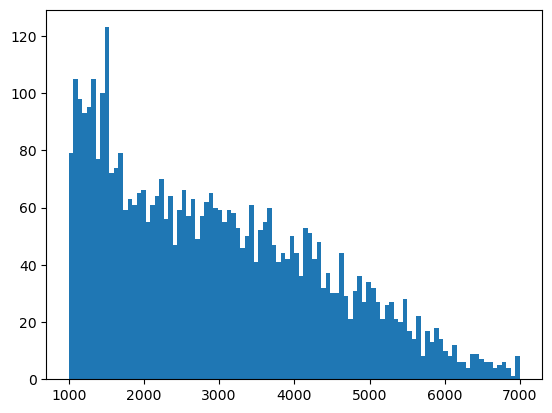

In [83]:
df= df[df['minutes played']<= 7000]
plt.hist(df['minutes played'], bins=100)
plt.show()

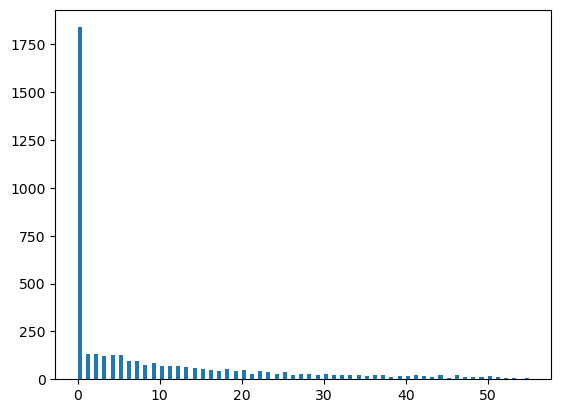

In [84]:
df = df[df['games_injured']<= 55]
plt.hist(df['games_injured'], bins=110)
plt.show()

## 2.Feature engineering


1.Feature scaling 
2.Aggregation 
3.One hot coding

In [85]:
df.shape

(4130, 17)

In [86]:
categorical_features

['team', 'position']

In [87]:
df.head(2)

,team,position,height,age,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,minutes played,games_injured,award,current_value,highest_value,position_encoded,winger
8,Manchester United,Defender Centre-Back,186.0,21.0,0.000000,0.000000,0.130529,0.0,0.0,0.0,2758,13,0,2000000,2000000,2,0
20,Manchester United,midfield-CentralMidfield,181.0,20.0,0.129125,0.064562,0.225968,0.0,0.0,0.0,2788,0,1,800000,800000,3,0


In [88]:
df = pd.get_dummies(df, columns=categorical_features)

In [89]:
# Calculate 25th and 85th percentiles for 'current_value'
p25 = df['current_value'].quantile(0.25)  # 25% threshold for cheap values
p85 = df['current_value'].quantile(0.85)  # 85% threshold for expensive values

# Define function to categorize 'current_value' based on thresholds
def categorize_value(value):
    if value < p25:
        return 'Cheap'      # Values below 25% are labeled as Cheap
    elif value < p85:
        return 'Moderate'   # Values between 25% and 85% are labeled as Moderate
    else:
        return 'Expensive'  # Values above 85% are labeled as Expensive

# Apply the function to create a new column 'value_category'
df['current_value_category'] = df['current_value'].apply(categorize_value)

# Remove original 'current_value' column if no longer needed
df.drop('current_value', axis=1, inplace=True)

# Display the distribution of each category to verify
print(df['current_value_category'].value_counts())

current_value_category
Moderate     2629
Cheap         812
Expensive     689
Name: count, dtype: int64


In [90]:
p25, p85


(300000.0, 2000000.0)

In [91]:
encoder = LabelEncoder()
df['current_value_category_encoded'] = encoder.fit_transform(df['current_value_category']) 

## 3.Feature selection


In [95]:
correlation = df.corr(numeric_only=True)
print(correlation['current_value_category_encoded'].sort_values(ascending=False))

current_value_category_encoded    1.000000
award                             0.113655
assists                           0.108739
games_injured                     0.096564
highest_value                     0.095093
                                    ...   
team_Royal AM FC                 -0.077782
team_Al-Adalah FC                -0.078508
position_Goalkeeper              -0.091610
team_Marumo Gallants FC          -0.097375
goals conceded                   -0.098749
Name: current_value_category_encoded, Length: 390, dtype: float64


In [99]:
df = df[selected_features]
df.head()

,assists,goals conceded,games_injured,award,highest_value,team_Marumo Gallants FC,position_Goalkeeper,current_value_category_encoded
8,0.000000,0.000000,13,0,2000000,False,False,1
20,0.064562,0.000000,0,1,800000,False,False,2
21,0.102506,0.000000,0,1,800000,False,False,2
55,0.000000,1.257883,0,0,2000000,False,True,1
56,0.000000,1.483871,14,0,3500000,False,True,2


## Prepare train and test data


In [100]:
# Prepare data
X = df.drop(['current_value_category_encoded'], axis=1)
y = df['current_value_category_encoded']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    shuffle=True,
                                                    random_state=42)

# sacle the data
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [101]:
X.shape


(4130, 7)

## Buliding the Model


In [104]:
model = LogisticRegression()


## Train the Model


In [105]:
model.fit(X_train_scaled, y_train)


LogisticRegression()

## Test the Model


In [106]:
y_pred = model.predict(X_test_scaled)


## Interpretation of the Model


In [107]:
coeff_df = pd.DataFrame(model.coef_[2],X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
assists,0.064691
goals conceded,0.087749
games_injured,0.132126
award,0.109324
highest_value,0.255251
team_Marumo Gallants FC,-0.014098
position_Goalkeeper,-0.056551


In [108]:
model.coef_


array([[-0.14144075,  0.24072031,  0.22037454,  0.0369918 , -2.82167124,
         0.13387297, -0.12217488],
       [ 0.07674932, -0.32846916, -0.35250007, -0.14631557,  2.56642036,
        -0.11977477,  0.17872541],
       [ 0.06469143,  0.08774885,  0.13212554,  0.10932378,  0.25525088,
        -0.0140982 , -0.05655053]])

In [109]:
print(model.intercept_) 


[-1.09453542 -0.85141744  1.94595287]


 ## Evaluating the Model


In [110]:
base_model = round(df['current_value_category_encoded'].value_counts()[1]/df.shape[0]*100, 2)
base_model

16.68

In [116]:
#ACURACY


y_pred_train = model.predict(X_train_scaled)


accuracy = accuracy_score(y_test, y_pred)
accuracy

0.8087167070217918

In [117]:
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix

array([[ 90,   1,  68],
       [  0,  90,  39],
       [  8,  42, 488]], dtype=int64)

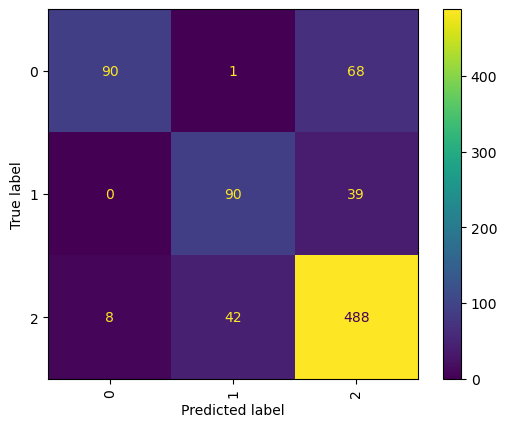

In [121]:
ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred,
    display_labels=model.classes_,  
    xticks_rotation='vertical' 
)
plt.show()

In [122]:
# Calculate Precision
# Precision = True Positives (TP) / (True Positives (TP) + False Positives (FP))
precision = precision_score(y_test, y_pred, average='macro')
print(f"Precision: {precision:.2f}")

Precision: 0.81


In [123]:
# Calculate Recall
# Recall = True Positives (TP) / (True Positives (TP) + False Negatives (FN))
recall = recall_score(y_test, y_pred, average='macro')
print(f"Recall: {recall:.2f}")


Recall: 0.72


In [124]:
# Calculate F1 Score
# F1 Score = 2 * (Precision * Recall) / (Precision + Recall)
f1 = f1_score(y_test, y_pred, average='macro')
print(f"F1 Score: {f1:.2f}")


F1 Score: 0.75
